<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Base/HW1_Regression_with_inference_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (base). Часть 1**

В этом домашнем задании вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;

**Максимальная оценка за дз**
> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$


**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.**

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

Фиксация сидов обеспечивает воспроизводимость результатов

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (2.5 балла)
- Визуализации признаков и их анализ (1 балл)

Всего можно набрать 3.5 основных балла и 0.65 бонусных. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (2.5 балла)**

In [2]:
import pandas as pd

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1 (0.5 балла)**

Вы уже встречались с pandas в первой половине семестра. Теперь будем постоянно (кроме некоторых случаев) использовать его для анализа данных и наслаивать навыки. Выполните операции, направленные на практику основных действий с `pandas`:

**0.1 балла**
- [X] Отобразите 30 случайных строк тренировочного датасета.
- [X] Отобразите первые 5 и последние 5 объектов тестового датасета
- [X] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения
- [X] Посмотрите, есть ли в данных явные дубликаты


**0.2 балла**
Ответьте на вопросы:
- [X] Выводы о чем можно сделать, используя случайные/верхние/нижние строки? А о чем нельзя?
- [X] Достаточно ли метода duplicated для анализа дубликатов? Почему?

**0.15 балла**
- [X] Постройте дашборд, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)

In [4]:
df_train.sample(30)

name  year  selling_price  km_driven  \
6565        Renault KWID Climber 1.0 MT BSIV  2019         300000      35000   
2943                      Maruti Wagon R LXI  2013         225000      58343   
2024                    Hyundai i20 Asta 1.2  2013         360000      30000   
263                     Hyundai i20 1.2 Asta  2010         300000      70000   
4586        Skoda Octavia L and K 1.9 TDI MT  2005         250000     120000   
4479                         Maruti Ciaz ZXi  2016         700000      20000   
4881  Hyundai Grand i10 1.2 Kappa Magna BSIV  2017         445000      27000   
3583          Ford Ecosport 1.5 DV5 MT Trend  2016         515000      68609   
6361                  Hyundai Verna 1.4 VTVT  2014         500000      33400   
4108                     Hyundai i20 Era 1.2  2015         490000      45900   
132          Mercedes-Benz S-Class S 350 CDI  2017        5850000      47000   
6974  Fiat Grande Punto 1.3 Dynamic (Diesel)  2012         450000      70000   
3383                       Maruti Ertiga VDI  2012         550000      67000   
5947                     Mahindra Bolero GLX  2006         200000     120000   
4970                Ford Fiesta 1.4 SXi TDCi  2009         180000     163000   
4260                    Maruti SX4 Zxi BSIII  2010         300000      50000   
5861                    Ford Figo Petrol LXI  2012         290000      25000   
2264                   Tata Safari Storme EX  2015         503000     110000   
1941                        Maruti Swift VXI  2018         550000      24400   
763    Ford Fiesta Classic 1.4 Duratorq CLXI  2012         300000      64000   
5384                Maruti Alto 800 LXI BSIV  2016         275000      38000   
3044              BMW X4 M Sport X xDrive20d  2019        5400000       7500   
6575    Ford EcoSport 1.5 TDCi Titanium BSIV  2017         934000     101000   
101                     Hyundai Verna 1.6 SX  2013         522000     150000   
3626                 Maruti Baleno Alpha 1.3  2018         740000      38817   
1371                        Mahindra Xylo D2  2011         450000      56000   
625                    Honda CR-V 2.4 4WD AT  2007         325000      70000   
3915            Mahindra TUV 300 mHAWK100 T8  2017         725000     100000   
1075                 Maruti Wagon R VXi BSII  2012         225000      80000   
6739               Tata Manza Aura Quadrajet  2010         110000      88000   

        fuel       seller_type transmission         owner     mileage  \
6565  Petrol        Individual       Manual   First Owner  23.01 kmpl   
2943  Petrol  Trustmark Dealer       Manual   First Owner  21.79 kmpl   
2024  Petrol        Individual       Manual   First Owner   18.5 kmpl   
263   Petrol        Individual       Manual   First Owner   17.0 kmpl   
4586  Diesel        Individual       Manual   Third Owner   16.4 kmpl   
4479  Petrol        Individual       Manual   First Owner  20.73 kmpl   
4881  Petrol        Individual       Manual   First Owner   18.9 kmpl   
3583  Diesel            Dealer       Manual   First Owner   22.7 kmpl   
6361  Petrol        Individual       Manual   First Owner  17.43 kmpl   
4108  Petrol        Individual       Manual  Second Owner   18.6 kmpl   
132   Diesel            Dealer    Automatic   First Owner   13.5 kmpl   
6974  Diesel        Individual       Manual   First Owner   20.3 kmpl   
3383  Diesel        Individual       Manual   First Owner  20.77 kmpl   
5947  Diesel        Individual       Manual  Second Owner         NaN   
4970  Diesel            Dealer       Manual   First Owner         NaN   
4260  Petrol        Individual       Manual   First Owner   15.0 kmpl   
5861  Petrol        Individual       Manual   First Owner   15.6 kmpl   
2264  Diesel        Individual       Manual   First Owner   14.1 kmpl   
1941  Petrol        Individual       Manual   First Owner   22.0 kmpl   
763   Diesel        Individual       Manual  Second Owner   17.8 kmpl   
5384  Petrol            De

In [5]:
pd.concat([df_test.head(5), df_test.tail(5)])

name  year  selling_price  km_driven  \
0                    Mahindra Xylo E4 BS IV  2010         229999     168000   
1                Tata Nexon 1.5 Revotorq XE  2017         665000      25000   
2                      Honda Civic 1.8 S AT  2007         175000     218463   
3                      Honda City i DTEC VX  2015         635000     173000   
4    Tata Indica Vista Aura 1.2 Safire BSIV  2011         130000      70000   
995                  Hyundai i10 Magna 1.1L  2008         250000     100000   
996        Hyundai i20 2015-2017 Sportz 1.2  2017         440000      50000   
997                  Hyundai i20 Era Diesel  2009         340000      40000   
998                        Hyundai i10 Asta  2012         350000      25000   
999                    Honda City i DTec SV  2016         700000     110000   

       fuel seller_type transmission         owner     mileage   engine  \
0    Diesel  Individual       Manual   First Owner   14.0 kmpl  2498 CC   
1    Diesel  Individual       Manual   First Owner   21.5 kmpl  1497 CC   
2    Petrol  Individual    Automatic   First Owner   12.9 kmpl  1799 CC   
3    Diesel  Individual       Manual   First Owner   25.1 kmpl  1498 CC   
4    Petrol  Individual       Manual  Second Owner   16.5 kmpl  1172 CC   
995  Petrol  Individual       Manual  Second Owner  19.81 kmpl  1086 CC   
996  Petrol  Individual       Manual  Second Owner   18.6 kmpl  1197 CC   
997  Diesel  Individual       Manual   First Owner   23.0 kmpl  1396 CC   
998  Petrol  Individual       Manual   First Owner  20.36 kmpl  1197 CC   
999  Diesel  Individual       Manual   First Owner   26.0 kmpl  1498 CC   

     max_power                    torque  seats  
0      112 bhp   260 Nm at 1800-2200 rpm    7.0  
1    108.5 bhp       260Nm@ 1500-2750rpm    5.0  
2      130 bhp            172Nm@ 4300rpm    5.0  
3     98.6 bhp            200Nm@ 1750rpm    5.0  
4       65 bhp      96  Nm at 3000  rpm     5.0  
995  68.05 bhp          99.04Nm@ 4500rpm    5.0  
996  81.83 bhp          114.7Nm@ 4000rpm    5.0  
997     90 bhp  22.4 kgm at 1750-2750rpm    5.0  
998   78.9 bhp          111.8Nm@ 4000rpm    5.0  
999   98.6 bhp            200Nm@ 1750rpm    5.0

In [6]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

mileage      202
engine       202
max_power    196
torque       203
seats        202
dtype: int64

In [7]:
df_train.duplicated().sum()

985

**Ответ 1:** Можно понять структуру данных и типы признаков, но нельзя анализировать распределения и закономерности

**Ответ 2:** Метода недостаточно, потому что он находит только полные копии строк и пропускает почти идентичные записи с мелкими отличиями и не учитывает какой столбец является целевой переменной.

In [8]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df_train, title='Датасет про машины')
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|█████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 207.98it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Мы обнаружили пропуски. Давайте избавимся от них.

**(0.05 балла)**
- [X] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [9]:
numeric_cols = df_train.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    if df_train[col].isnull().any():
        train_median = df_train[col].median()
        df_train[col] = df_train[col].fillna(train_median)
        df_test[col] = df_test[col].fillna(train_median)

In [10]:
# Остались только текстовые, их пока не трогаем
df_train.isnull().sum()[df_train.isnull().sum() > 0]

mileage      202
engine       202
max_power    196
torque       203
dtype: int64

### **Задание 2 (0.5 балла)**

На прошлом шаге вы рассмотрели дубликаты. Однако дубликат может быть связан с не только полным повторением информации в нескольких строках, но и частиным. Например, объект мог был внесен в базу данных с разным значением целевой переменной. В этом шаге займемся такими дублями!

**Ваши действия:**

- [X] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [X] Отобразите такие объекты (0.15 балла)
- [X] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [X]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [11]:
features = df_train.columns.drop('selling_price')
duplicates = df_train.duplicated(subset=features)
duplicates.sum()

1159

In [12]:
df_train[duplicates]

name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
268                     Maruti Swift Dzire VXI  2014         400000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
...                                        ...   ...            ...   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transmission         owner     mileage  \
254       35000  Petrol  Individual       Manual   First Owner   18.9 kmpl   
258       50000  Petrol  Individual       Manual  Second Owner   18.6 kmpl   
268       70000  Petrol  Individual       Manual  Second Owner   19.1 kmpl   
324        9000  Diesel      Dealer    Automatic   First Owner   13.6 kmpl   
325       20000  Petrol      Dealer    Automatic   First Owner  22.37 kmpl   
...         ...     ...         ...          ...           ...         ...   
6947      60000  Petrol  Individual       Manual  Second Owner   18.0 kmpl   
6984      24000  Diesel  Individual       Manual   First Owner   24.4 kmpl   
6989      50000  Diesel  Individual       Manual   First Owner  26.59 kmpl   
6997      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   
6998      25000  Diesel  Individual       Manual   First Owner  23.57 kmpl   

       engine   max_power               torque  seats  
254   1197 CC      82 bhp       114Nm@ 4000rpm    5.0  
258   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
268   1197 CC    85.8 bhp       114Nm@ 4000rpm    5.0  
324   1999 CC     177 bhp  430Nm@ 1750-2500rpm    5.0  
325   2487 CC  214.56 bhp  202Nm@ 3600-5200rpm    5.0  
...       ...         ...                  ...    ...  
6947   995 CC      62 bhp      90.3Nm@ 4200rpm    5.0  
6984  1498 CC   98.63 bhp  215Nm@ 1750-3000rpm    5.0  
6989  1248 CC      74 bhp       190Nm@ 2000rpm    5.0  
6997  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  
6998  1396 CC      70 bhp  140Nm@ 1800-3000rpm    5.0  

[1159 rows x 13 columns]

In [13]:
df_train = df_train.drop_duplicates(subset=features)
df_train = df_train.reset_index(drop=True)

In [14]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.25 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [X] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [X] Приведите тип данных к ``float``.
* [X] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [15]:
df_train['mileage'] = pd.to_numeric(df_train['mileage'].str.split().str[0], errors='coerce')
df_train['engine'] = pd.to_numeric(df_train['engine'].str.split().str[0], errors='coerce')
df_train['max_power'] = pd.to_numeric(df_train['max_power'].str.split().str[0], errors='coerce')
df_train.drop('torque', axis=1, inplace=True)

In [16]:
df_test['mileage'] = pd.to_numeric(df_test['mileage'].str.split().str[0], errors='coerce')
df_test['engine'] = pd.to_numeric(df_test['engine'].str.split().str[0], errors='coerce')
df_test['max_power'] = pd.to_numeric(df_test['max_power'].str.split().str[0], errors='coerce')
df_test.drop('torque', axis=1, inplace=True)

In [17]:
df_train[['mileage', 'engine', 'max_power']].dtypes

mileage      float64
engine       float64
max_power    float64
dtype: object

In [18]:
df_test[['mileage', 'engine', 'max_power']].dtypes

mileage      float64
engine       float64
max_power    float64
dtype: object

### **Задание 4 (0.1 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [X] Осуществите приведение столбцов к необходимому типу.

In [19]:
numeric_cols = df_train.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    if df_train[col].isnull().any():
        train_median = df_train[col].median()
        df_train[col] = df_train[col].fillna(train_median)
        df_test[col] = df_test[col].fillna(train_median)

In [20]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Series([], dtype: int64)

In [21]:
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

In [22]:
df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

In [23]:
df_test.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int32
max_power        float64
seats              int32
dtype: object

### **Задание 5 (0.15 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [X] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [X] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [X] Сделайте вывод.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [24]:
df_train.describe()

year  selling_price     km_driven      mileage       engine  \
count  5840.000000   5.840000e+03  5.840000e+03  5840.000000  5840.000000   
mean   2013.428425   5.229601e+05  7.395224e+04    19.430841  1429.448973   
std       4.095622   5.354320e+05  6.007114e+04     3.985973   485.662834   
min    1983.000000   2.999900e+04  1.000000e+00     0.000000   624.000000   
25%    2011.000000   2.500000e+05  3.900000e+04    16.950000  1197.000000   
50%    2014.000000   4.050000e+05  7.000000e+04    19.370000  1248.000000   
75%    2017.000000   6.400000e+05  1.000000e+05    22.300000  1498.000000   
max    2020.000000   1.000000e+07  2.360457e+06    42.000000  3604.000000   

         max_power        seats  
count  5840.000000  5840.000000  
mean     87.906371     5.426712  
std      31.640418     0.982344  
min       0.000000     2.000000  
25%      68.000000     5.000000  
50%      81.860000     5.000000  
75%      99.000000     5.000000  
max     400.000000    14.000000

In [25]:
df_test.describe()

year  selling_price      km_driven     mileage      engine  \
count  1000.000000   1.000000e+03    1000.000000  1000.00000  1000.00000   
mean   2013.681000   6.179010e+05   71393.341000    19.33881  1454.87600   
std       4.012149   7.585539e+05   48486.218662     3.95175   521.99574   
min    1995.000000   3.100000e+04    1303.000000     0.00000   624.00000   
25%    2011.000000   2.500000e+05   37000.000000    16.55000  1197.00000   
50%    2014.000000   4.349990e+05   61500.000000    19.37000  1248.00000   
75%    2017.000000   6.700000e+05  100000.000000    22.30000  1582.00000   
max    2020.000000   6.000000e+06  375000.000000    32.26000  3604.00000   

         max_power        seats  
count  1000.000000  1000.000000  
mean     90.841670     5.403000  
std      34.893389     0.912921  
min      34.200000     4.000000  
25%      69.000000     5.000000  
50%      82.425000     5.000000  
75%     102.000000     5.000000  
max     280.000000     9.000000

In [26]:
df_train.describe(include=['object'])

name    fuel seller_type transmission        owner
count                     5840    5840        5840         5840         5840
unique                    1924       4           3            2            5
top     Maruti Swift Dzire VDI  Diesel  Individual       Manual  First Owner
freq                        91    3177        5223         5336         3603

In [27]:
df_test.describe(include=['object'])

name    fuel seller_type transmission        owner
count                  1000    1000        1000         1000         1000
unique                  621       4           3            2            5
top     Maruti Alto 800 LXI  Diesel  Individual       Manual  First Owner
freq                     15     534         837          877          623

**Вывод:** Данные выглядят логично, пропусков больше нет. Распределения train и test похожи.

In [28]:
# Удалили torque
assert df_train.shape == (5840, 12)

## **Визуализации (1 балл + 0.5 бонус)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (0.5 балла)**

Шаг 1.
- [X] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [X] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [X] Постройте pairplot по тестовым данным
- [X] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

In [29]:
%matplotlib inline

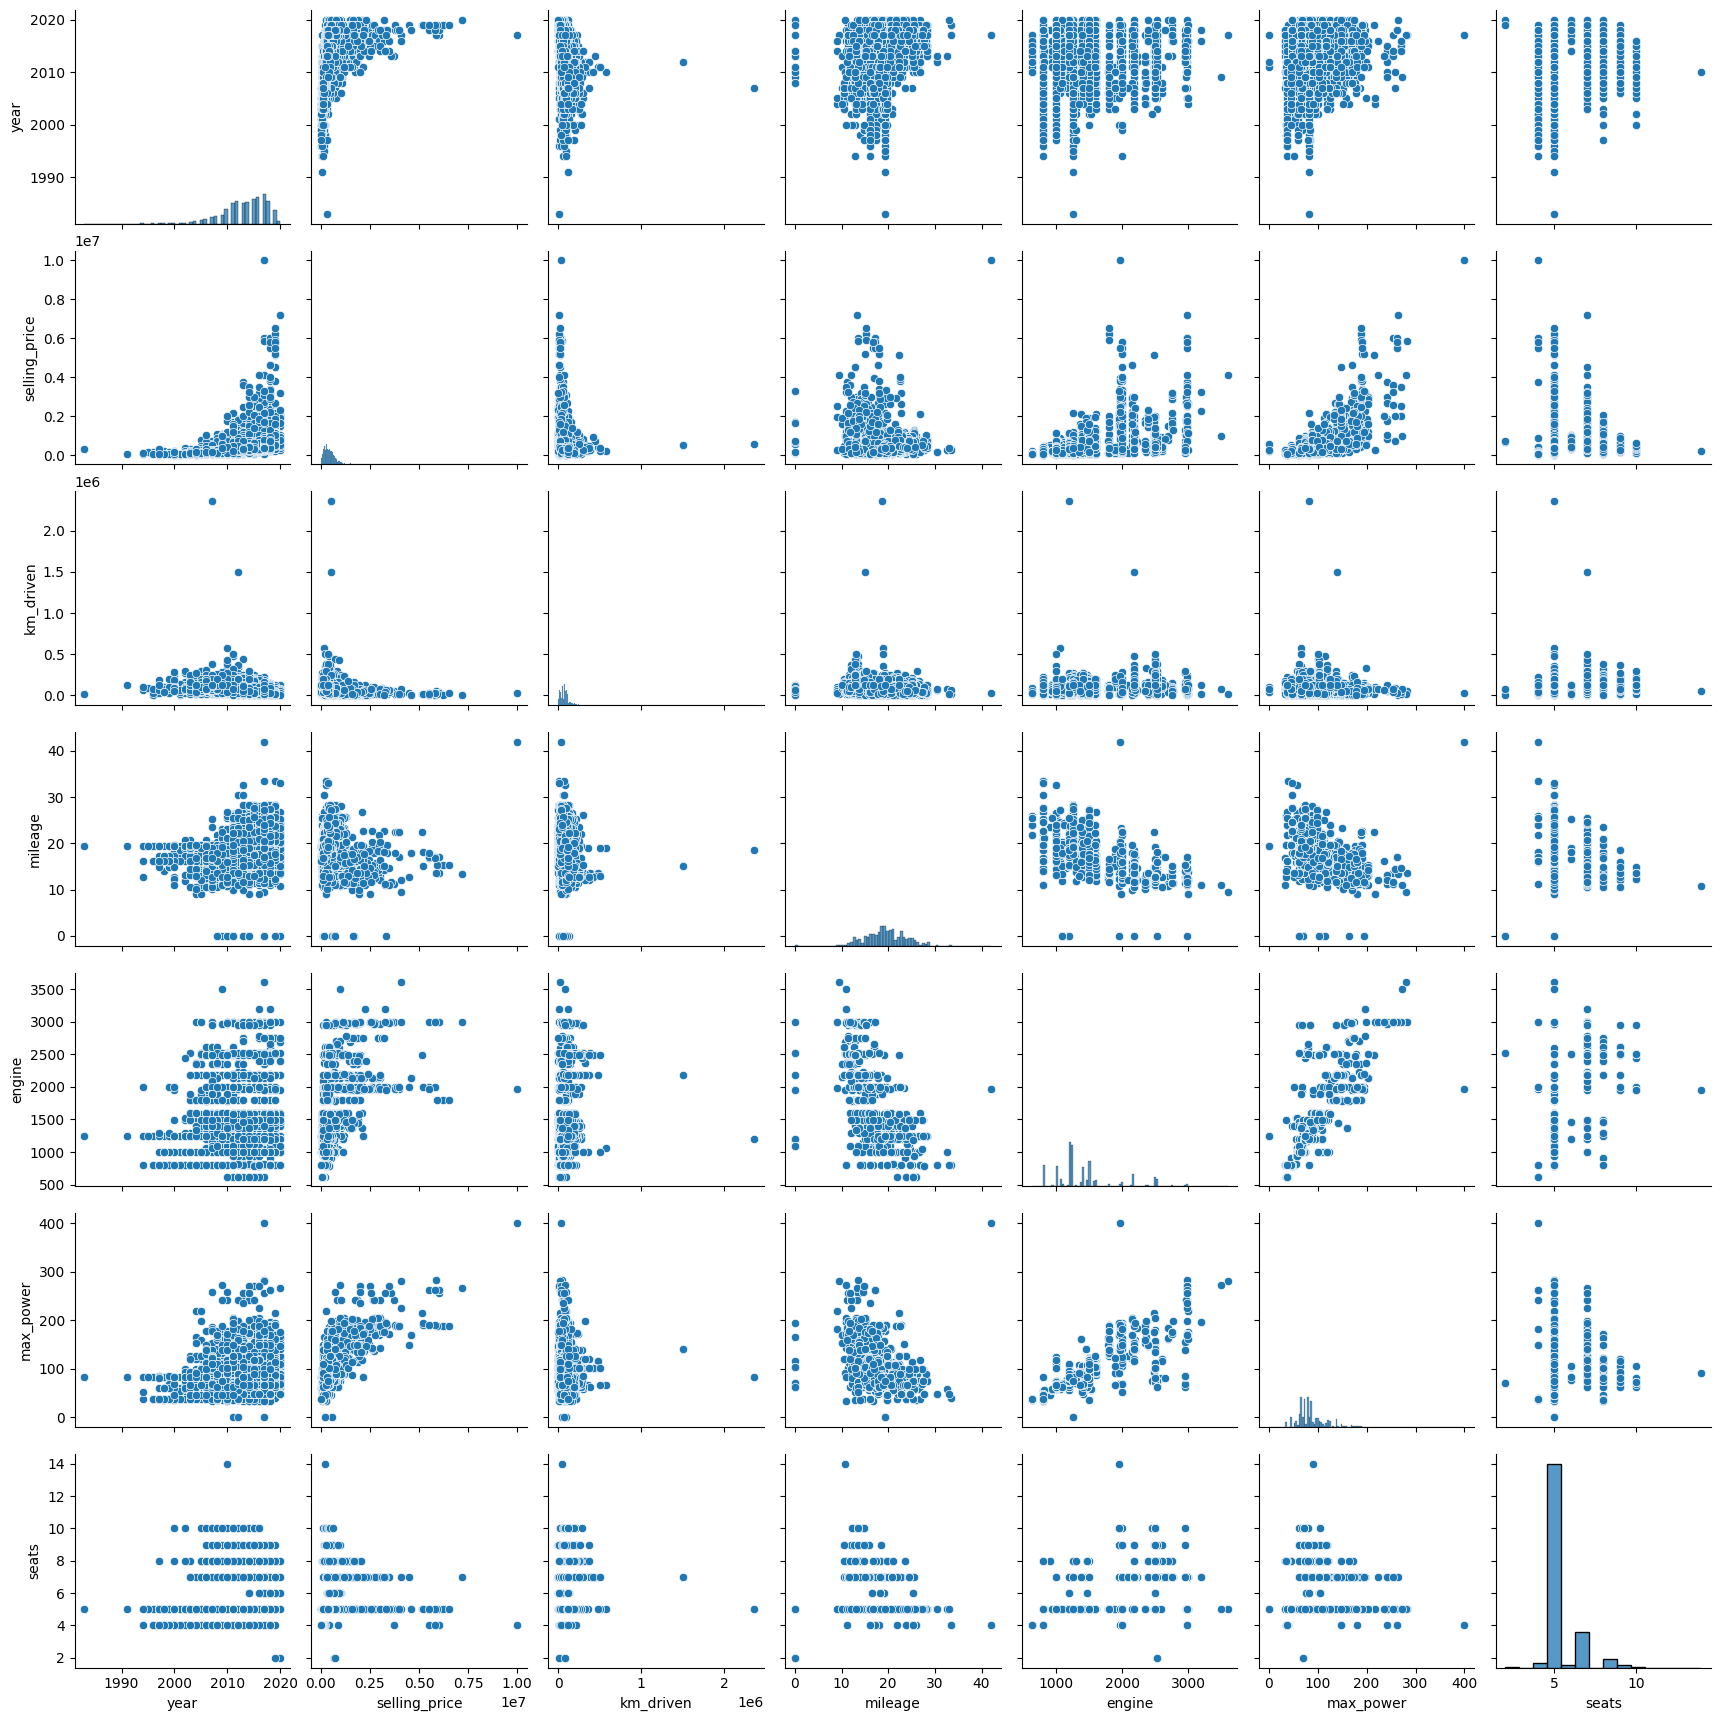

In [30]:
sns.pairplot(df_train)
plt.show()

**Вывод**: Видно, что selling_price как минимум зависит от year, engine и max_power. Некоторые признаки явно скореллированы, например engine и max_power.

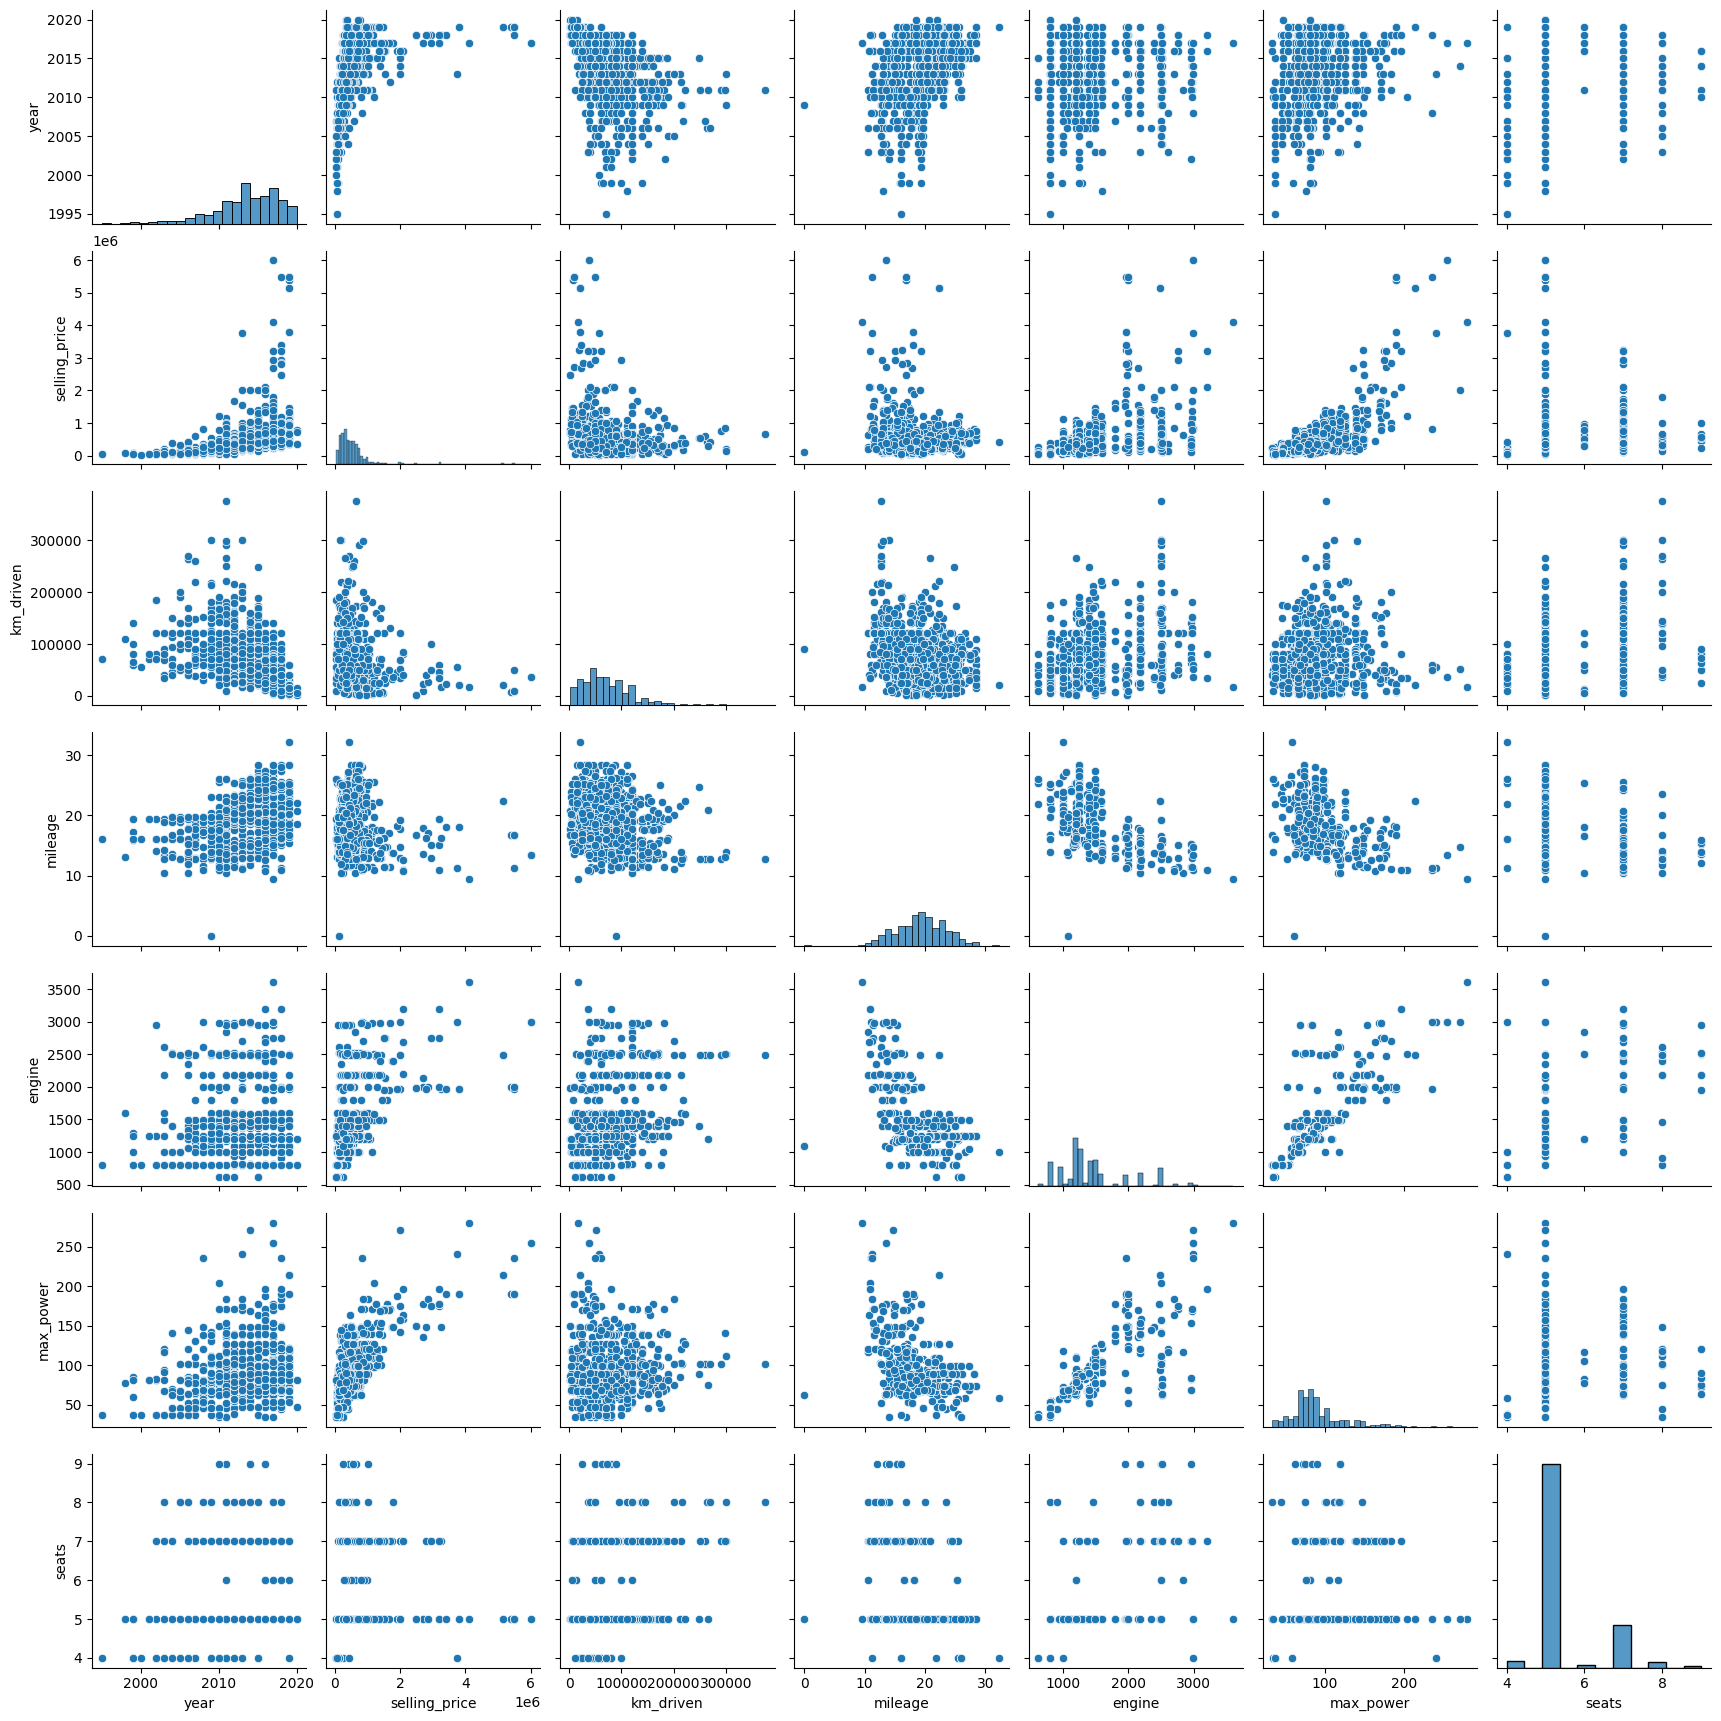

In [31]:
sns.pairplot(df_test)
plt.show()

**Вывод**: Распределения train и test похожи.

### **Задание 7 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [X] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [X] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


In [32]:
corr_matrix = df_train.corr(numeric_only=True)
corr_matrix

year  selling_price  km_driven   mileage    engine  \
year           1.000000       0.427279  -0.368966  0.341334  0.002819   
selling_price  0.427279       1.000000  -0.164828 -0.104769  0.447672   
km_driven     -0.368966      -0.164828   1.000000 -0.182086  0.229766   
mileage        0.341334      -0.104769  -0.182086  1.000000 -0.572893   
engine         0.002819       0.447672   0.229766 -0.572893  1.000000   
max_power      0.156858       0.692814   0.024588 -0.373390  0.681117   
seats          0.041178       0.149953   0.192328 -0.451059  0.652172   

               max_power     seats  
year            0.156858  0.041178  
selling_price   0.692814  0.149953  
km_driven       0.024588  0.192328  
mileage        -0.373390 -0.451059  
engine          0.681117  0.652172  
max_power       1.000000  0.244112  
seats           0.244112  1.000000

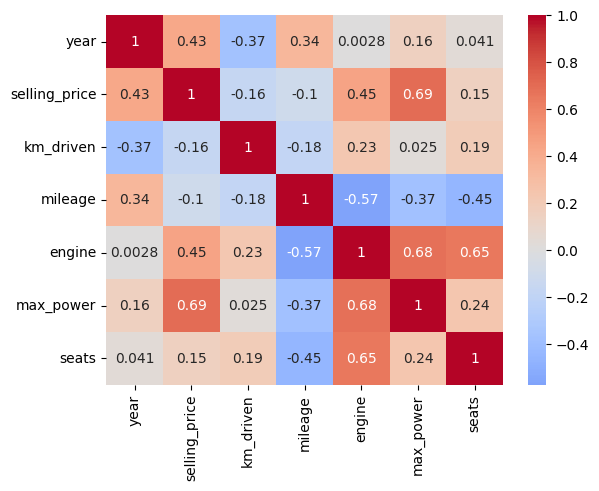

In [33]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

- [X] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

**Ответ 1**: Признаки engine и mileage имеют самую сильную отрицательную зависимость. Самую маленькую по модулю корелляцию имеют year и engine.

**Ответ 2**: Между engine, max_power и selling price.

**Ответ 3**: Приавльно, так как корреляция отрицательная.

### **Бонус (0.5 балла)**

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их **и поясните.**

- Каждая дополнительная визуализация может принести до 0.25 баллов при условии, что она обоснована.

In [34]:
# your code here

# **Часть 2 | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.25 балла;

### **Задание 8 (0.05 балла)**

Сделайте тренировочный и тестовый наборы. Сделайте на тренировочный и тестовый наборы. Она уже даны, достаточно просто отделить целевой признак Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных. Используйте уже имеющиеся данные train и test при разбиении. Если считаете уместным применить какую-то более хитрую технику разбиения — примените, но опишите, зачем.

In [35]:
numeric_features = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']
train_numeric = df_train[numeric_features].copy()
test_numeric = df_test[numeric_features].copy()

In [36]:
X_train = train_numeric
y_train = df_train['selling_price']

Используюятся переменные: 'year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats'

In [37]:
X_test = test_numeric  
y_test = df_test['selling_price']

### **Задание 9 (0.2 балла)**

Построим нашу первую модель!
- [X] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [X] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

lr = LinearRegression()
lr.fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(f'Train R2: {r2_score(y_train, y_train_pred):.4f}')
print(f'Test R2: {r2_score(y_test, y_test_pred):.4f}')
print(f'Train MSE: {MSE(y_train, y_train_pred):.2f}')
print(f'Test MSE: {MSE(y_test, y_test_pred):.2f}')

Train R2: 0.5923
Test R2: 0.5941
Train MSE: 116874153930.03
Test MSE: 233298779730.46


**Выводы:** Качество среднее, на test метрики ожидаемо немного хуже.

### **Задание 10 (0.15 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [X] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)

y_train_pred_scaled = lr_scaled.predict(X_train_scaled)
y_test_pred_scaled = lr_scaled.predict(X_test_scaled)

print(f'Train R2: {r2_score(y_train, y_train_pred_scaled):.4f}')
print(f'Test R2: {r2_score(y_test, y_test_pred_scaled):.4f}')
print(f'Train MSE: {MSE(y_train, y_train_pred_scaled):.2f}')
print(f'Test MSE: {MSE(y_test, y_test_pred_scaled):.2f}')

Train R2: 0.5923
Test R2: 0.5941
Train MSE: 116874153930.03
Test MSE: 233298779730.45


**Вывод:** Метрики почти не изменились.

### **Задание 11 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [X] Какой признак оказался наиболее информативным в предсказании цены?

In [40]:
coef_pairs = [(feature, coef) for feature, coef in zip(numeric_features, lr_scaled.coef_)]
sorted_features = sorted(coef_pairs, key=lambda x: abs(x[1]), reverse=True)
sorted_features

[('max_power', 322807.3532592337),
 ('year', 152772.5708458141),
 ('engine', 61178.49433684747),
 ('km_driven', -44158.81852005271),
 ('mileage', 28833.92577751717),
 ('seats', -23209.132485997394)]

**Вывод**: наиболее важный оказался max_power.

### **Задание 12 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [X] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [X] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [41]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

y_train_lasso = lasso.predict(X_train_scaled)
y_test_lasso = lasso.predict(X_test_scaled)

print(f'Train R2: {r2_score(y_train, y_train_lasso):.4f}')
print(f'Test R2: {r2_score(y_test, y_test_lasso):.4f}')
print(f'Train MSE: {MSE(y_train, y_train_lasso):.2f}')
print(f'Test MSE: {MSE(y_test, y_test_lasso):.2f}')

Train R2: 0.5923
Test R2: 0.5941
Train MSE: 116874153940.14
Test MSE: 233299450599.17


**Ответ**: Метрики опять сильно не изменились.

In [42]:
list(zip(numeric_features, lasso.coef_))

[('year', 152772.39021419562),
 ('km_driven', -44157.689857942605),
 ('mileage', 28832.04339588388),
 ('engine', 61173.66240922125),
 ('max_power', 322808.23691946967),
 ('seats', -23206.25564908013)]

**Ответ**: Не занулила, скорее всего потому что все признаки важны.

### **Задание 13 Финальный рывок (0.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [X] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [X] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [43]:
from sklearn.model_selection import GridSearchCV

params = {'alpha': [10**i for i in range(-3, 11)]}
lasso = Lasso()

grid_search = GridSearchCV(lasso, params, cv=10, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

best_lasso = grid_search.best_estimator_

y_train_lasso_best = best_lasso.predict(X_train_scaled)
y_test_lasso_best = best_lasso.predict(X_test_scaled)

print(f'Train R2: {r2_score(y_train, y_train_lasso_best):.4f}')
print(f'Test R2: {r2_score(y_test, y_test_lasso_best):.4f}')
print(f'Train MSE: {MSE(y_train, y_train_lasso_best):.2f}')
print(f'Test MSE: {MSE(y_test, y_test_lasso_best):.2f}')

Train R2: 0.5893
Test R2: 0.5816
Train MSE: 117736595208.78
Test MSE: 240511826990.23


In [44]:
print(f'Количество моделей: {len(params["alpha"]) * 10}')
print(f'Лучший alpha: {grid_search.best_params_["alpha"]}')

Количество моделей: 140
Лучший alpha: 10000


In [45]:
list(zip(numeric_features, best_lasso.coef_))

[('year', 151810.98386365655),
 ('km_driven', -32735.113566286363),
 ('mileage', 9285.99792205306),
 ('engine', 17841.622334842363),
 ('max_power', 329230.14757174574),
 ('seats', -0.0)]

**Ответ:** занулилось seats

**Ваша задача 2:**

- [X] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [X] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [46]:
from sklearn.linear_model import ElasticNet

params = {'alpha': [10**i for i in range(-3, 11)], 'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]}

elastic = ElasticNet()
grid_search = GridSearchCV(elastic, params, cv=10, scoring='r2')
grid_search.fit(X_train_scaled, y_train)

best_elastic = grid_search.best_estimator_

y_train_elastic = best_elastic.predict(X_train_scaled)
y_test_elastic = best_elastic.predict(X_test_scaled)

print(f'Train R2: {r2_score(y_train, y_train_elastic):.4f}')
print(f'Test R2: {r2_score(y_test, y_test_elastic):.4f}')
print(f'Train MSE: {MSE(y_train, y_train_elastic):.2f}')
print(f'Test MSE: {MSE(y_test, y_test_elastic):.2f}')

Train R2: 0.5884
Test R2: 0.5722
Train MSE: 117993441993.76
Test MSE: 245894595583.24


In [47]:
print(f'Количество моделей: {len(params["alpha"]) * len(params["l1_ratio"]) * 10}')
print(f'Лучшие параметры: {grid_search.best_params_}')

Количество моделей: 840
Лучшие параметры: {'alpha': 1, 'l1_ratio': 0.9}


# **Часть 3| Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.75 основных балла и 0.25 бонусных.


**Задание 14 (0.1 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
- [X] Удалить столбец`name`

In [48]:
df_train.drop('name', axis=1, inplace=True)
df_test.drop('name', axis=1, inplace=True)

In [49]:
X_train_cat = df_train.drop('selling_price', axis=1)
X_test_cat = df_test.drop('selling_price', axis=1)

В другом случае, конечно, мы могли бы предобработать данный столбец. В качестве бонуса предлагаем вам придумать и реализовать алгоритм предобработки.

**Бонус 0.25 балла**
- [ ] Предобработайте столбец `name`, чтобы избежать его удаления. Если предобработали столбец — можно закомментировать assert

In [50]:
assert X_train_cat.shape == (5840, 10)

In [51]:
X_train_cat.describe(include='object')

fuel seller_type transmission        owner
count     5840        5840         5840         5840
unique       4           3            2            5
top     Diesel  Individual       Manual  First Owner
freq      3177        5223         5336         3603

### **Задание 15 (0.4 балла)**

- [X] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [52]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

categorical_features = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']

encoder = OneHotEncoder(drop='first', sparse_output=False)
X_train_encoded = encoder.fit_transform(X_train_cat[categorical_features])
X_test_encoded = encoder.transform(X_test_cat[categorical_features])

feature_names = encoder.get_feature_names_out(categorical_features)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=feature_names)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=feature_names)

X_train_final = pd.concat([X_train_cat.drop(categorical_features, axis=1), X_train_encoded], axis=1)
X_test_final = pd.concat([X_test_cat.drop(categorical_features, axis=1), X_test_encoded], axis=1)

In [53]:
X_train_final.shape

(5840, 23)

### **Задание 16 (0.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [X] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [X] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [54]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

params = {'alpha': [10**i for i in range(-3, 11)]}
ridge = Ridge()

grid_search = GridSearchCV(ridge, params, cv=10, scoring='r2')
grid_search.fit(X_train_final, y_train)

best_ridge = grid_search.best_estimator_

y_train_ridge = best_ridge.predict(X_train_final)
y_test_ridge = best_ridge.predict(X_test_final)

print(f'Train R2: {r2_score(y_train, y_train_ridge):.4f}')
print(f'Test R2: {r2_score(y_test, y_test_ridge):.4f}')
print(f'Train MSE: {MSE(y_train, y_train_ridge):.2f}')
print(f'Test MSE: {MSE(y_test, y_test_ridge):.2f}')

C:\Users\MK\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:213: LinAlgWarning: Ill-conditioned matrix (rcond=5.05758e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Train R2: 0.6538
Test R2: 0.6457
Train MSE: 99239748171.39
Test MSE: 203677821138.43


**Ответ:** Метрики однозначно стали лучше.

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 17 (0.5 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [X] Реализуйте метрику `business_metric`
- [X] Посчитайте метрику для всех обученных моделей и определеите, какая лучше всего решает задачу бизнеса

In [55]:
def business_metric(y_true, y_pred):
    within_10_percent = np.abs((y_pred - y_true) / y_true) <= 0.1
    return np.mean(within_10_percent)

models = {
    'Linear regression': y_test_pred,
    'Linear regression scaled': y_test_pred_scaled,
    'Lasso default': y_test_lasso,
    'Lasso best': y_test_lasso_best, 
    'ElasticNet best': y_test_elastic,
    'Ridge best': y_test_ridge
}

for name, test_pred in models.items():
    test_metric = business_metric(y_test, test_pred)
    print(f'{name}: {test_metric:.4f}')

Linear regression: 0.2270
Linear regression scaled: 0.2270
Lasso default: 0.2270
Lasso best: 0.2350
ElasticNet best: 0.2410
Ridge best: 0.2460


**Ответ:** Лучше всего работает Ridge.

# **<font color="green">Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)</font>**

Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

- Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
- На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
- Визуализировать веса обученной модели (1 балл)

In [64]:
import pickle

pipeline = {
    'model': best_ridge,
    'feature_names': X_train_final.columns.tolist(),
    'numeric_features': [feat for feat in numeric_features if feat != 'seats'],
    'categorical_features': categorical_features,
    'encoder': encoder
}

with open('ridge_model.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

# **Часть 6 | Оформление репозитория и оценка сервиса (3 балла)**

**Результаты вашей работы** необходимо разместить в своём GitHub-репозитории. В этот же репозиторий позже будет добавлена вторая часть.

Под результатами первой части понимаем следующее:

---

### Обязательные файлы:

1. **`.ipynb`-ноутбук** со всеми экспериментами:

   * полный EDA,
   * все шаги препроцессинга,
   * обучение и сравнение моделей,
   * сохранённые output’ы.

2. **`.pickle`-файл**, содержащий:

   * обученную модель (или пайплайн `scaler + model`);
   * параметры скейлинга;
   * любые числовые объекты, необходимые для инференса внутри Streamlit-приложения.

3. **`.md`-файл с выводами** о проделанной работе:

   * что было сделано (краткое описание каждого этапа);
   * какие результаты были получены (метрики + интерпретация);
   * что дало наибольший прирост качества;
   * что сделать не удалось и почему (это нормально и даже полезно);
   * **оценка разработанного сервиса**:

     * насколько приложение удобно в использовании;
     * что получилось визуализировать хорошо, а что — менее удачно;
     * какие ограничения или проблемы вы заметили;
     * какие улучшения планируете в следующей итерации.

По результатам второй части, ждем:

4. **Streamlit-приложение** (например, `app.py`), которое можно запустить командой:

   ```bash
   streamlit run app.py
   ```

**И ссылку на приложение в StreamlitHub.**

В приложении должно быть:

* отображение ключевых графиков EDA;
* ввод данных (CSV или ручной ввод);
* применение модели;
* визуализация весов/коэффициентов.



### **За что могут быть сняты баллы:**

* отсутствие `.pickle` с моделью / пайплайном;
* слабая или неполная аналитика в `.md`-файле;
* беспорядок в ноутбуке или неясная логика вычислений;
* отсутствие возможности запустить Streamlit-приложение.